In [27]:
import refinitiv.dataplatform as rdp
import datetime
import pandas as pd
rdp.open_desktop_session('DEFAULT_CODE_BOOK_APP_KEY')

In [29]:
response = rdp.Search.search(
    view = rdp.SearchViews.GovCorpInstruments,
    filter = "(RCSParentDomicile eq 'G:53' or RCSParentDomicile eq 'G:3H') and PrincipalCurrency eq 'USD' and RCSCountry ne 'G:53' and IsActive eq true ",
    select = "RIC,RCSTRBC2012Leaf,IssueDate,EOMAmountOutstanding,PricingRedemDate,IssuerLegalName,PricingClosingYield, CurrentYield, FaceIssuedTotal,EOMPriceChange,RCSBondGradeLeaf,EOMPriceReturn",
    top = 10000
)
#response.data.raw

In [30]:
df = rdp.get_search_metadata(view = rdp.SearchViews.GovCorpInstruments)
df.loc[['RCSParentDomicile', 'PrincipalCurrency', 'RCSCountry', 'IsActive']]

,,Type,Searchable,Sortable,Navigable,Groupable,Exact,Symbol
RCSParentDomicile,RCSParentDomicile,String,True,False,True,True,True,False
PrincipalCurrency,PrincipalCurrency,String,True,True,False,False,False,False
RCSCountry,RCSCountry,String,True,False,True,True,True,False
IsActive,IsActive,Boolean,True,True,True,False,False,False


In [31]:
data = []
for exch in response.data.raw['Hits']:
    data.append(exch)

In [32]:
df = pd.DataFrame(data, columns = ['RIC','RCSTRBC2012Leaf','IssueDate','EOMAmountOutstanding','PricingRedemDate','IssuerLegalName',
                                   'PricingClosingYield', 'CurrentYield', 'FaceIssuedTotal','EOMPriceChange','RCSBondGradeLeaf','EOMPriceReturn'])
df

,RIC,RCSTRBC2012Leaf,IssueDate,EOMAmountOutstanding,PricingRedemDate,IssuerLegalName,PricingClosingYield,CurrentYield,FaceIssuedTotal,EOMPriceChange,RCSBondGradeLeaf,EOMPriceReturn
0,BM163599660=,"Real Estate Rental, Development & Operations (...",2017-06-23T00:00:00.000Z,3.000000e+08,NaN,RKI Overseas Finance 2017 (A) Limited,9.044976,9.046850,3.000000e+08,-0.625,High Yield,-0.793567
1,HK163733218=,Corporate Financial Services (NEC),2017-07-03T00:00:00.000Z,5.000000e+08,2023-01-03T00:00:00.000Z,Franshion Brilliant Limited,6.214462,4.076433,5.000000e+08,0.000,Investment Grade,0.000000
2,KY165347072=,"Real Estate Rental, Development & Operations (...",2017-08-24T00:00:00.000Z,3.000000e+08,NaN,CIFI HOLDINGS (GROUP) CO. LTD.,10.692031,5.665349,3.000000e+08,0.875,High Yield,0.908062
3,CN167935001=,Corporate Financial Services (NEC),2017-09-14T00:00:00.000Z,7.750000e+08,2022-09-14T00:00:00.000Z,Wei Chai Guo Ji (Xiang Gang) Neng Yuan Ji Tuan...,2.215115,3.717472,7.750000e+08,-0.250,Investment Grade,-0.243754
4,HK167702457=,Commercial Buildings,2017-09-21T00:00:00.000Z,6.000000e+08,2022-09-21T00:00:00.000Z,Sino-Ocean Land Treasure III Limited,52.623441,6.292135,6.000000e+08,-0.125,High Yield,-0.156675
...,...,...,...,...,...,...,...,...,...,...,...,...
5641,CN158789434=,Corporate Financial Services (NEC),2017-04-06T00:00:00.000Z,NaN,NaN,TEWOO GROUP FINANCE NO 3 LIMITED,NaN,NaN,3.000000e+08,NaN,NaN,NaN
5642,CN159913279=,Investment Banking & Brokerage Services (NEC),2017-04-20T00:00:00.000Z,NaN,NaN,Nuoxi Capital Limited,NaN,NaN,3.000000e+08,NaN,NaN,NaN
5643,CN159317196=,Fossil Fuel Electric Utilities,2017-05-18T00:00:00.000Z,5.000000e+08,NaN,Hua Chen Dian Li Gu Fen Gong Si,NaN,NaN,5.000000e+08,0.000,NaN,NaN
5644,KY162759809=,"Real Estate Rental, Development & Operations (...",2017-06-30T00:00:00.000Z,2.247453e+09,2024-07-01T00:00:00.000Z,KAISA GROUP HOLDINGS LTD.,72.001203,40.322581,3.119000e+09,-3.250,High Yield,-12.264151


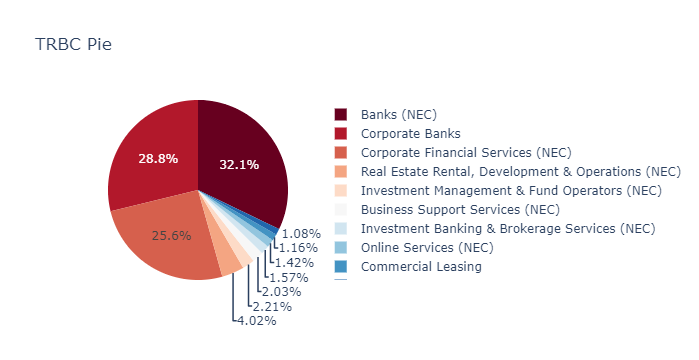

In [33]:
import plotly.express as px
rt = df.groupby("RCSTRBC2012Leaf",as_index=False).agg('count')
rt = rt.sort_values('RIC', ascending = False).head(10)
fig = px.pie(rt, values='RIC', names='RCSTRBC2012Leaf', title='TRBC Pie',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

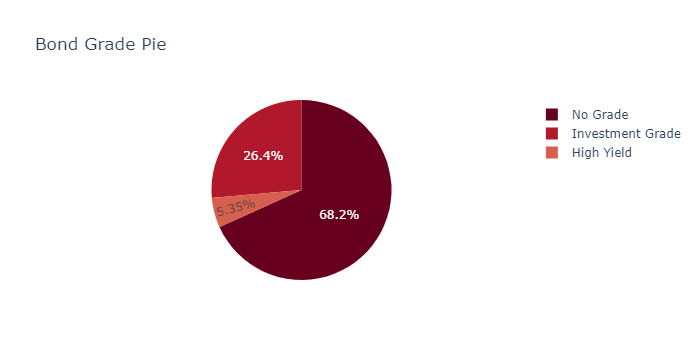

In [34]:
df['RCSBondGradeLeaf'].fillna("No Grade", inplace=True)
grad = df.groupby("RCSBondGradeLeaf",as_index=False).agg('count')
fig = px.pie(grad, values='RIC', names='RCSBondGradeLeaf', title='Bond Grade Pie',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

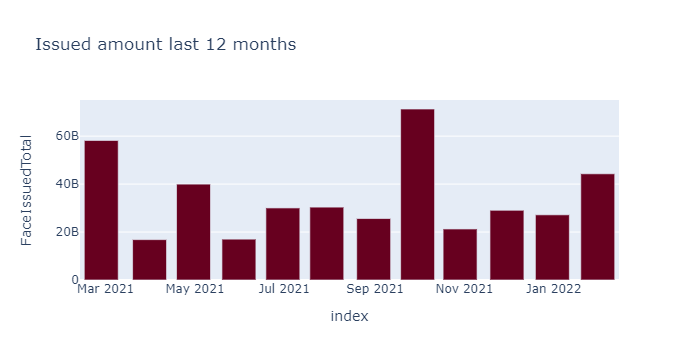

In [35]:
from datetime import date
from dateutil.relativedelta import relativedelta
decb = date.today() + relativedelta(months=-12)
start = datetime.datetime(decb.year, decb.month, 1).strftime("%Y-%m-%d %H:%M:%S")[0:10]
end = date.today().strftime("%Y-%m-%d %H:%M:%S")[0:10]

cols = ['RIC','IssueDate','FaceIssuedTotal']
c = df[cols].copy()
c.loc[:,"IssueDate"] = pd.to_datetime(c["IssueDate"])
c = c.set_index("IssueDate").sort_index(ascending=False)
c_month = c.resample('BM').sum()
c_monthb = c_month[start:end]
c_monthb.index.name = None

import plotly.express as px
fig = px.bar(c_monthb, y='FaceIssuedTotal', title = 'Issued amount last 12 months', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

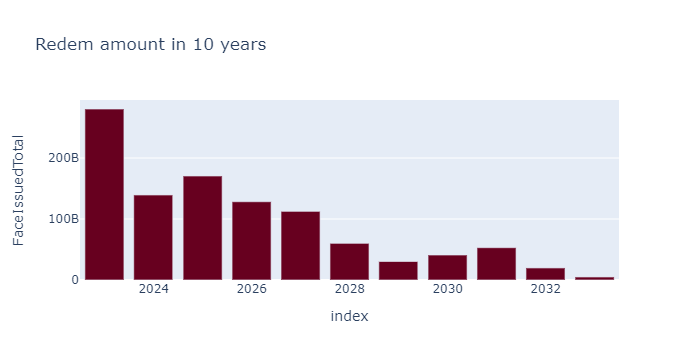

In [36]:
yearsf = date.today() + relativedelta(years=+10)
end = datetime.datetime(yearsf.year, yearsf.month, 1).strftime("%Y-%m-%d %H:%M:%S")[0:4]
start = date.today().strftime("%Y-%m-%d %H:%M:%S")[0:4]
cols = ['RIC','PricingRedemDate','FaceIssuedTotal']
d = df[cols].copy()
d.loc[:,"PricingRedemDate"] = pd.to_datetime(d["PricingRedemDate"], errors = 'coerce')
d = d.set_index("PricingRedemDate").sort_index(ascending=True)
d_month = d.resample('BY').sum()
d_monthf = d_month[start:end]
d_monthf.index.name = None

import plotly.express as px
fig = px.bar(d_monthf, y='FaceIssuedTotal',title = 'Redem amount in 10 years', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

2021-11-01 2022-02-16


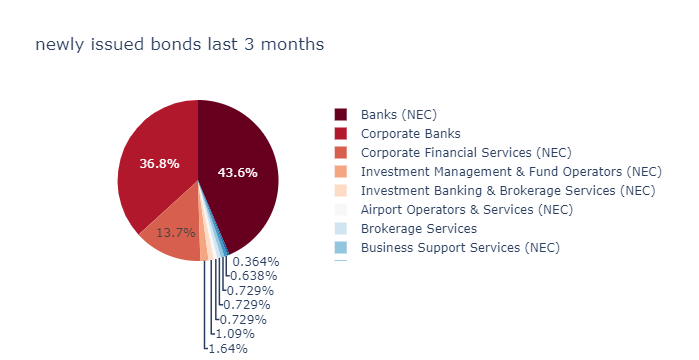

In [37]:
monb3 = date.today() + relativedelta(months=-3)
start = datetime.datetime(monb3.year, monb3.month, 1).strftime("%Y-%m-%d %H:%M:%S")[0:10]
end = date.today().strftime("%Y-%m-%d %H:%M:%S")[0:10]
print(start, end)
cols = ['RIC','IssueDate','FaceIssuedTotal','RCSTRBC2012Leaf']
f = df[cols].copy()
f.loc[:,"IssueDate"] = pd.to_datetime(f["IssueDate"])
f = f.set_index("IssueDate").sort_index(ascending=True)
f_3m = f[start:end]
rt = f_3m.groupby("RCSTRBC2012Leaf",as_index=False).agg('count')
rt = rt.sort_values('RIC', ascending = False).head(10)
fig = px.pie(rt, values='RIC', names='RCSTRBC2012Leaf', title='newly issued bonds last 3 months',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [39]:
cols = ['RIC','IssuerLegalName','EOMPriceReturn','EOMPriceChange']
price = df[cols].copy()

price_top10 = price.sort_values('EOMPriceReturn', ascending = False).head(10)
price_top10

,RIC,IssuerLegalName,EOMPriceReturn,EOMPriceChange
204,CN212241539=,YANGO (CAYMAN) INVESTMENT LIMITED,19.200000,3.000
1978,VG165911962=,AGILE GROUP HOLDINGS LIMITED,16.883886,9.500
2073,VG238227437=,AGILE GROUP HOLDINGS LIMITED,16.656230,9.125
3655,BM206552239=,PB Issuer (No.5) Limited,14.462898,23.971
4075,HK209803445=,Sino-Ocean Land Treasure Iv Limited,13.677552,10.000
59,VG207141348=,AGILE GROUP HOLDINGS LIMITED,13.569179,3.500
64,VG208152467=,AGILE GROUP HOLDINGS LIMITED,13.269949,3.625
2837,KY217838231=,REDCO PROPERTIES GROUP LIMITED,12.263859,5.500
45,VG200347161=,AGILE GROUP HOLDINGS LIMITED,12.228569,3.375
25,VG178542273=,AGILE GROUP HOLDINGS LIMITED,12.165832,3.500


In [40]:
cols = ['RIC','IssuerLegalName','CurrentYield','PricingClosingYield']
y = df[cols]
y = y[y['CurrentYield']>0]

In [41]:
yield_top10 = y.sort_values('CurrentYield', ascending = False).head(10)
yield_top10

,RIC,IssuerLegalName,CurrentYield,PricingClosingYield
3657,BM191261364=,Noble Trading Hold Co Limited,216.666667,215.808541
3131,CN232077654=,YANGO (CAYMAN) INVESTMENT LIMITED,126.315789,450.212479
5619,CN225310785=,YANGO (CAYMAN) INVESTMENT LIMITED,125.000000,319.357457
2102,CN222357438=,YANGO (CAYMAN) INVESTMENT LIMITED,109.302326,1268.360726
3051,CN236982947=,YANGO (CAYMAN) INVESTMENT LIMITED,109.170306,215.113586
204,CN212241539=,YANGO (CAYMAN) INVESTMENT LIMITED,96.153846,41036.337209
5601,HK196021825=,MIE HOLDINGS CORPORATION,91.666667,3642.857143
5618,KY223820891=,KAISA GROUP HOLDINGS LTD.,71.311475,NaN
1421,CN218228895=,"Hejun Shunze Investment Co., Limited",64.705882,1498.263889
5621,CN226205268=,"Hejun Shunze Investment Co., Limited",61.176471,259.937595


In [42]:
yeild_last10 = y.sort_values('CurrentYield', ascending = True).head(10)
yeild_last10

,RIC,IssuerLegalName,CurrentYield,PricingClosingYield
155,06428FUT2=,Bank of China Limited (New York Branch),0.050000,0.086490
306,06428FTS6=,Bank of China Limited (New York Branch),0.050001,0.094301
635,06428FTY3=,Bank of China Limited (New York Branch),0.050003,0.102707
703,06428FUE5=,Bank of China Limited (New York Branch),0.050003,0.105161
1024,06428FUL9=,Bank of China Limited (New York Branch),0.050006,0.113872
1246,06428FUP0=,Bank of China Limited (New York Branch),0.050009,0.124198
1350,45581ECB5=,"INDUSTRIAL AND COMMERCIAL BANK OF CHINA (USA),...",0.050012,0.135932
1384,06428FTM9=,Bank of China Limited (New York Branch),0.050013,0.139877
1577,06428FTZ0=,Bank of China Limited (New York Branch),0.050021,0.166949
1631,06428FTC1=,Bank of China Limited (New York Branch),0.050023,0.174937


In [43]:
rdp.close_session()